In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [44]:
data= pd.read_csv('mydramalist.csv')[['type', 'country']]
data.head(3)

,type,country
0,Movie,Japan
1,Drama,Japan
2,Movie,Japan


In [50]:
data.iloc[0,1]

' Japan '

In [51]:
for i in data.columns:
    data[i]= data[i].str.strip()

In [52]:
data.iloc[0,1]

'Japan'

In [10]:
data.isna().sum()

type       0
country    0
dtype: int64

In [87]:
col_1= data['type'].unique()
col_1

col_2= data['country'].unique()
col_2

array(['Japan', 'South Korea', 'Hong Kong', 'Taiwan', 'China'],
      dtype=object)

### Data bentuk pertama

In [86]:
new_data1= pd.DataFrame(col_1, columns=['type'])

for i in data['country'].unique():
    temp_data= pd.DataFrame()
    for j in new_data1['type']:
        added_count= (data[(data['type']==j) & (data['country']==i)]).count()[0]
        
        temp_data= pd.concat([temp_data, pd.Series(added_count)], axis='rows')
        
    new_data1[i]= temp_data.reset_index(drop=True)

new_data1

,type,Japan,South Korea,Hong Kong,Taiwan,China
0,Movie,108.0,85.0,30.0,3.0,16.0
1,Drama,132.0,90.0,19.0,33.0,16.0
2,Special,24.0,7.0,0.0,0.0,0.0


### Data bentuk kedua

In [89]:
new_data2= pd.DataFrame(col_2, columns=['country'])

for i in data['type'].unique():
    temp_data= pd.DataFrame()
    for j in new_data2['country']:
        added_count= (data[(data['type']==i) & (data['country']==j)]).count()[0]
        
        temp_data= pd.concat([temp_data, pd.Series(added_count)], axis='rows')
        
    new_data2[i]= temp_data.reset_index(drop=True)

new_data2

,country,Movie,Drama,Special
0,Japan,108.0,132.0,24.0
1,South Korea,85.0,90.0,7.0
2,Hong Kong,30.0,19.0,0.0
3,Taiwan,3.0,33.0,0.0
4,China,16.0,16.0,0.0


### PLOT

#### Data pertama

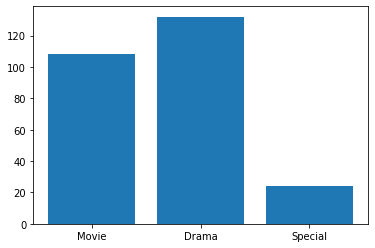

In [83]:
plt.bar(new_data['type'], new_data['Japan'])
plt.show()

<AxesSubplot:xlabel='type'>

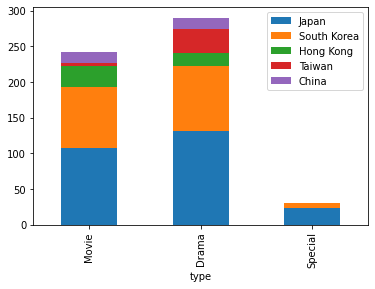

In [95]:
new_data.plot(kind='bar', x='type', stacked=True)

#### Data kedua

<BarContainer object of 5 artists>

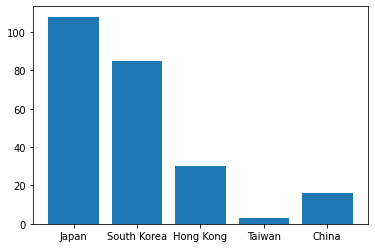

In [92]:
plt.bar(new_data2['country'], new_data2['Movie'])

<AxesSubplot:xlabel='country'>

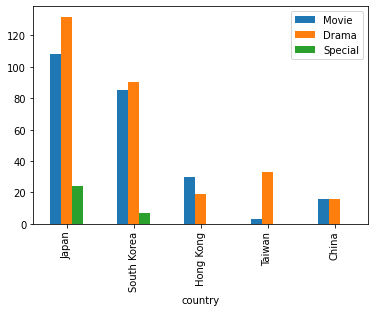

In [107]:
new_data2.plot(kind='bar', x='country')

Plot seperti di atas tapi secara tradisional matplotlib

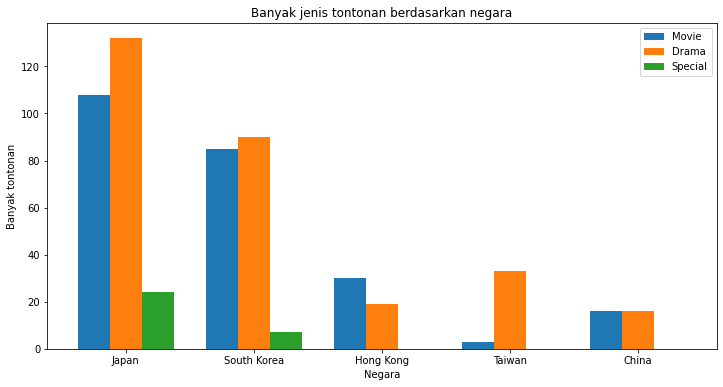

In [109]:
# plt.bar(new_data2['country'], new_data2['China'])
width= 0.25

x_indexes= np.arange(len(new_data2['country']))

plt.figure(figsize=(12,6))

plt.bar(x_indexes-width, new_data2['Movie'], label='Movie', width=width)
plt.bar(x_indexes, new_data2['Drama'], label='Drama', width=width)
plt.bar(x_indexes+width, new_data2['Special'], label='Special', width=width)

plt.title('Banyak jenis tontonan berdasarkan negara')
plt.xlabel('Negara')
plt.ylabel('Banyak tontonan')
plt.xticks(x_indexes, new_data2['country'])

plt.legend()

plt.show()